# RUN EACH CELL TO get outputs without error

1. x, y divide
2. x, y mapping
3. x binarizing
4. x NaN handle
5. x feature interaction
6. histogram
7. outlier detection (idk which feature to choose)
8. dim reduction PCA
9. dim reduction - feature selection
10. ROC AUV stuck
* error : multi class outcome / target (y)

Edited dataset used: 
* ssc/o level result merged into 1 col manually
* hsc/a level result merged manually
* new col : MEDIUM (values: ban,eng,eng-ver,madrasah)


In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

#/////////////////////////////////////////////////////////
#feature selection for preparing machine learning data in Python with scikit-learn.
#   4 different automatic feature selection techniques:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import Binarizer 
from sklearn.feature_selection import SelectFromModel

C:\Users\RUBYu\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load dataset information
dt= pd.read_csv('Desktop/data/usis29mar.csv')
#dt.head()
dt.shape

(2277, 9)

In [3]:
dt.head()

,1st_choice,2nd_choice,3rd_choice,ssc_or_olevel,hsc_or_alevel,medium,ssc_board,hsc_board,registered_program
0,PHR-1,BBA-2,BIO-3,5.0,4.5,ban,Dhaka,Dhaka,PHR
1,CSE-1,EEE-2,APE-3,5.0,5.0,ban,Dhaka,Dhaka,APE
2,PHR-1,MIC-2,BIO-3,5.0,4.8,ban,Dhaka,Dhaka,PHR
3,LLB-1,ENG-2,BBA-3,NaN,4.0,eng,NaN,NaN,LLB
4,BBA-1,ENG-2,NaN,5.0,5.0,ban,Dhaka,Dhaka,BBA


In [4]:
dt['registered_program'].value_counts()

ENG    199
PHR    196
BIO    195
MIC    193
ECO    189
CS     183
LLB    182
CSE    179
EEE    179
BBA    168
ARC    146
ECE    132
ANT     60
PHY     33
APE     25
MAT     18
Name: registered_program, dtype: int64

In [5]:
#divide features and output/target
x = dt.drop('registered_program',1)
map_obj_y=  { "registered_program":{"PHY" : 1,"ECO" : 2, "ANT" :3,"CSE":4, "ARC":5, "PHR":6,"BBA" : 7, "BIO":8,
               "LLB":9,"ENG":10,"MAT":11, "MIC":12,"APE":13,"ECE":14, "EEE":15, "CS":16}}
dt.replace(map_obj_y  ,inplace=True)
y = dt.registered_program

In [6]:
print(x.head(5))

  1st_choice 2nd_choice 3rd_choice  ssc_or_olevel  hsc_or_alevel medium  \
0      PHR-1      BBA-2      BIO-3            5.0            4.5    ban   
1      CSE-1      EEE-2      APE-3            5.0            5.0    ban   
2      PHR-1      MIC-2      BIO-3            5.0            4.8    ban   
3      LLB-1      ENG-2      BBA-3            NaN            4.0    eng   
4      BBA-1      ENG-2        NaN            5.0            5.0    ban   

  ssc_board hsc_board  
0     Dhaka     Dhaka  
1     Dhaka     Dhaka  
2     Dhaka     Dhaka  
3       NaN       NaN  
4     Dhaka     Dhaka  


In [7]:
print(y.head(5)) #y already mapped

0     6
1    13
2     6
3     9
4     7
Name: registered_program, dtype: int64


# dealing with dtype of features (x values)

In [8]:
x['ssc_board'].head(20) # example

0        Dhaka
1        Dhaka
2        Dhaka
3          NaN
4        Dhaka
5          NaN
6        Dhaka
7        Dhaka
8        Dhaka
9        Dhaka
10    Rajshahi
11    Rajshahi
12       Dhaka
13    Dinajpur
14         NaN
15       Dhaka
16       Dhaka
17         NaN
18       Dhaka
19       Dhaka
Name: ssc_board, dtype: object

In [9]:
pd.get_dummies(x['ssc_board']).head(20) # binarize

,Barisal,CBSE,Chittagong,Comilla,Dhaka,Dinajpur,Jessore,Madrasah,Others,Rajshahi,Sylhet
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0


Do this binarizing for all features in x

In [18]:
#check how many unique values - method

for col_name in x.columns:
    if x[col_name].dtypes == 'object':
        unique_cat = len(x[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique catagories".format(
             col_name=col_name, unique_cat= unique_cat))

Feature '1st_choice' has 16 unique catagories
Feature '2nd_choice' has 17 unique catagories
Feature '3rd_choice' has 17 unique catagories
Feature 'medium' has 4 unique catagories
Feature 'ssc_board' has 12 unique catagories
Feature 'hsc_board' has 12 unique catagories


In [19]:
# create a list of features to dummy
todummy_list = ['1st_choice','2nd_choice','3rd_choice','medium','ssc_board','hsc_board']

In [20]:
# function to dummy all the cat var used for modeling
def dummy_dt(dt,todummy_list):
    for n in todummy_list:
        dummies = pd.get_dummies(dt[n], prefix=n,dummy_na=False)
        dt=dt.drop(n,1)
        dt=pd.concat([dt,dummies],axis=1)
    return dt

In [21]:
x = dummy_dt(x,todummy_list)
x.head(20)

,ssc_or_olevel,hsc_or_alevel,1st_choice_ANT-1,1st_choice_APE-1,1st_choice_ARC-1,1st_choice_BBA-1,1st_choice_BIO-1,1st_choice_CS-1,1st_choice_CSE-1,1st_choice_ECE-1,...,hsc_board_CBSE,hsc_board_Chittagong,hsc_board_Comilla,hsc_board_Dhaka,hsc_board_Dinajpur,hsc_board_Jessore,hsc_board_Madrasah,hsc_board_Others,hsc_board_Rajshahi,hsc_board_Sylhet
0,5.00,4.5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.00,5.0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,5.00,4.8,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,NaN,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.00,5.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,5.00,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,5.00,5.0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,5.00,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,5.00,4.9,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9,NaN,5.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# deal with Nan/empty entries

In [22]:
dt.isnull().sum().sort_values(ascending=False)

3rd_choice            1000
hsc_board              554
ssc_board              545
hsc_or_alevel          301
ssc_or_olevel          214
2nd_choice              53
registered_program       0
medium                   0
1st_choice               0
dtype: int64

In [23]:
#Impute missing values using Imputer in aklearn.preprocessing
# y doesn't have any NaN values in the dataset
from sklearn.preprocessing import Imputer

imp= Imputer(missing_values= 'NaN', strategy='median', axis=0) 
#median posses no issue cause ssc/olevel result is now in one col -
#manually and another feature "medium" was added manually
imp.fit(x)
x= pd.DataFrame(data=imp.transform(x),columns=x.columns)

#now check again for null if any
x.isnull().sum().sort_values(ascending=False).head(10) #x has 76 columns after binarizing

hsc_board_Sylhet    0
2nd_choice_EEE-2    0
2nd_choice_ARC-2    0
2nd_choice_BBA-2    0
2nd_choice_BIO-2    0
2nd_choice_CS-2     0
2nd_choice_CSE-2    0
2nd_choice_ECE-2    0
2nd_choice_ECO-2    0
2nd_choice_ENG-2    0
dtype: int64

# Outlier detection 
NOT SURE IF WE NEED THIS

# with  Turkey IQR
identifies extreme values in data

outliers defined as: values below Q1-1.5(Q3-Q1) 
or above Q3+1.5(Q3-Q1)

example: if values are from 0 ..to ... 100
q1 = 25
q3 = 75
difference = iqr = 50
 floor = q1 - 1.5*iqr
 ceiling = q3 + 1.5*iqr
values lower or higher than this range will be considered as outliers

In [24]:
def find_outliers_turkey(n):
    q1=np.percentile(n,25)
    q3=np.percentile(n,75)
    iqr= q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices= list(n.index[(n<floor)|(n>ceiling)])
    outlier_values = list(n[outlier_indices])
    return outlier_indices, outlier_values

turkey_indices, turkey_values = find_outliers_turkey(x['ssc_or_olevel']) 
#not sure which feature to check
#  print(np.sort(turkey_values))

# Distribution of features
A histogram is a simple representation of the distribution of values for a given feature
X-axis represents value bins and y-axis represents the frequaency of an observation falling into that bin
It is also interesting to look at distributions broken up by outcome catagories

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_histogram(n):
    plt.hist(n,color='gray',alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=n.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

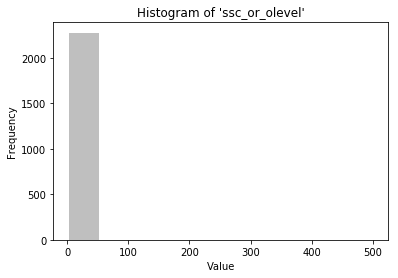

In [26]:
plot_histogram(x['ssc_or_olevel'])

In [27]:
#plot hist to show distribution of features by DV catagories

def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]),alpha=0.5,label='DV=0')
    plt.hist(list(x[y==1]),alpha=0.5,label='DV=1')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

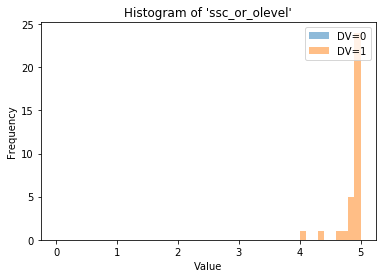

In [28]:
plot_histogram_dv(x['ssc_or_olevel'],y)

# Feature engineering

A. interaction among features
A simple two-way interaction is represented by:
x3=x1*x2 where x3 is the interaction between x1 and x2


10 features = 45 two-way interaction terms 

interaction between every feature
* for example: 1st_choice_CSE-1_ssc_board_Dhaka

we have 76 features after binarizing


In [29]:
#build method

from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(dt):
    #get feat names
    combos= list(combinations(list(dt.columns),2))
    colnames = list(dt.columns) +['_'.join(x) for x in combos] 
    
    #find interactions
    poly = PolynomialFeatures(interaction_only=True,include_bias=False)
    dt=poly.fit_transform(dt)
    dt= pd.DataFrame(dt)
    dt.columns = colnames
    
    #remove interaction terms with all 0 values
    noint_indices = [i for i, x in enumerate(list((dt==0).all()))if x]
    dt = dt.drop(dt.columns[noint_indices],axis=1)
    
    return dt

In [30]:
x= add_interactions(x)
# print(x.head()) ##onek slow

In [31]:
x.shape

(2277, 1624)

#  dim reduction using PCA

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
x_pca = pd.DataFrame(pca.fit_transform(x))
print(x_pca.head(5))

           0         1         2         3         4         5         6   \
0 -110.580444  1.345810 -4.217223 -1.553170  0.116687 -0.002300  5.393418   
1 -108.076489  3.450579 -3.114871  8.775674 -1.797224 -0.892108 -1.051815   
2 -109.078100  1.348969 -4.878756 -1.636454 -0.395543 -1.454530  6.968665   
3 -113.138253 -4.924177  6.297630 -2.982045 -5.224618  0.915644 -0.868827   
4 -108.076535  1.344936 -5.196333 -1.965077 -1.204198  5.364117 -3.401782   

         7         8         9     ...           40        41        42  \
0  2.134296  0.118293 -3.588223    ...     1.504117  1.008858  2.551234   
1 -0.131153  0.504620 -1.099957    ...     1.780845 -0.514904 -1.504130   
2 -4.729166 -0.465891 -1.642731    ...     0.786665 -0.579352  0.566672   
3  0.970153 -0.979655 -1.315486    ...     0.141721 -0.329157 -0.062627   
4 -1.859937 -0.518377 -1.094346    ...    -0.235013 -0.376540  0.475241   

         43        44        45        46        47        48        49  
0 -0.400291 

# Feature selection 

In [33]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=.70)

print(dt.shape)
print(x.shape)

(2277, 9)
(2277, 1624)


C:\Users\RUBYu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
#large set of feat can cause overfitting
# feature selection

import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=30)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [x.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]


C:\Users\RUBYu\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [  55   66  130  141  204  215  228  236  248  250  251  260  304  306
  313  315  386  394  395  400  403  405  408  410  417  421  425  426
  429  430  433  444  448  492  537  543  554  560  621  623  625  626
  648  649  686  696  728  730  746  752  757  783  788  796  797  813
  818  827  832  833  843  848  857  864  867  870  873  876  877  879
  882  903  909  915  924  932  936  951  952  953  959  960  961  967
  971  989 1065 1080 1081 1090 1095 1105 1116 1143 1154 1164 1173 1174
 1202 1207 1211 1215 1241 1243 1249 1266 1273 1281 1302 1305 1308 1311
 1314 1319 1325 1338 1347 1348 1350 1356 1359 1362 1371 1381 1387 1408
 1432 1451 1459 1464 1465 1472 1474 1475 1481 1486 1511 1512 1520 1521
 1537 1544 1548 1550 1552 1562 1571 1572 1574 1581 1595 1604 1608] are constant.
  UserWarning)


In [35]:
colnames_selected

['1st_choice_ANT-1',
 '1st_choice_ARC-1',
 '1st_choice_BIO-1',
 '1st_choice_ECO-1',
 '1st_choice_ENG-1',
 '1st_choice_LLB-1',
 '1st_choice_MAT-1',
 '1st_choice_PHR-1',
 '1st_choice_PHY-1',
 'ssc_or_olevel_1st_choice_ANT-1',
 'ssc_or_olevel_1st_choice_BIO-1',
 'ssc_or_olevel_1st_choice_ECO-1',
 'ssc_or_olevel_1st_choice_ENG-1',
 'ssc_or_olevel_1st_choice_LLB-1',
 'ssc_or_olevel_1st_choice_MAT-1',
 'ssc_or_olevel_1st_choice_PHR-1',
 'ssc_or_olevel_1st_choice_PHY-1',
 'hsc_or_alevel_1st_choice_BBA-1',
 'hsc_or_alevel_1st_choice_BIO-1',
 'hsc_or_alevel_1st_choice_ECO-1',
 'hsc_or_alevel_1st_choice_EEE-1',
 'hsc_or_alevel_1st_choice_ENG-1',
 'hsc_or_alevel_1st_choice_LLB-1',
 'hsc_or_alevel_1st_choice_MAT-1',
 'hsc_or_alevel_1st_choice_PHR-1',
 'hsc_or_alevel_1st_choice_PHY-1',
 '1st_choice_ENG-1_medium_ban',
 '1st_choice_LLB-1_medium_ban',
 '1st_choice_LLB-1_hsc_board_Dhaka',
 '1st_choice_MAT-1_medium_eng']

# ROC AUV

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_pref(X_train,y_train,X_test,y_test):
    model = LogisticRegression()
    model.fit(X_train,y_train)
    y_hat = [n[1] for n in model.predict_proba(X_test)]
       
    return roc_auc_score(y_test, y_hat)

print(find_model_pref(X_train_selected,y_train,X_test_selected,y_test))

ValueError: multiclass format is not supported